In [260]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import random
import arviz as az
from collections import OrderedDict
import theano as tt




#generic polynomial regression
def polynomial_basis(x,degree=1):
    X=np.zeros((len(x),degree+1))
    for d in range(degree+1):
        X[:,d]=x**d
    return X

#generic least squares algorithm
def leastsquares(X,y):
    yc = y.reshape(-1,1) #column vector
    M = np.linalg.inv(np.matmul(X.T,X))
    theta = np.matmul(M, np.matmul(X.T,y) )
    return theta

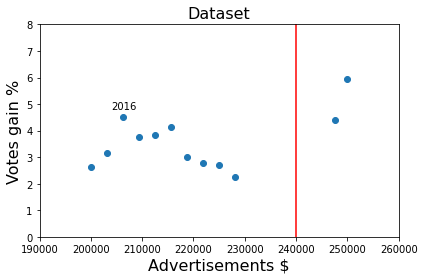

In [309]:
#True Model
np.random.seed(5)
#True Model
theta=np.array([0.5, 3, -9.8, 8.1, -0.6])*5
n=12 #number of observations
x_tr =np.hstack([np.linspace(0,0.56,10),np.linspace(0.95,1,2)])
X8_tr = polynomial_basis(x_tr,degree=8)
x_te = np.linspace(0,1,100)
X_tr = polynomial_basis(x_tr,degree=4)
X_te = polynomial_basis(x_te,degree=4)
y_tr = np.matmul(X_tr,theta)+np.random.randn(n)/3
shift=200000
scale=50000
#plt.plot(x_te,np.matmul(X_te,theta),label='True')
plt.scatter(scale*x_tr+shift,y_tr)
plt.text(204000,4.8,"2016")
plt.axvline(0.8*50000+200000,color='r')
plt.xlim([190000,260000])
plt.ylim([0,8])
plt.title("Dataset",fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.tight_layout()
plt.savefig("dataset_US.pdf")

In [216]:

    #posterior = pm.sample(5000, tune=1000,chains=2)

INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


In [215]:
prior['theta'][i]

array([  4.52766799,   1.63719763,  -0.82641017,   6.65958933,
       -10.77366879,   9.67715435,  -2.38437312,  18.1675365 ,
         4.90665317])

In [223]:
model.logp_array(prior['theta'][i])

array(-297221.69627428)

In [242]:
np.exp(30+np.sum(pm.Normal.dist(mu=0, sd=10, shape=(1+8,)).logp(prior['theta'][i]).eval()))

0.1630177198671168

10
19
28
51
63
73
78
99
119
126
129
132
144
149
161
165
178


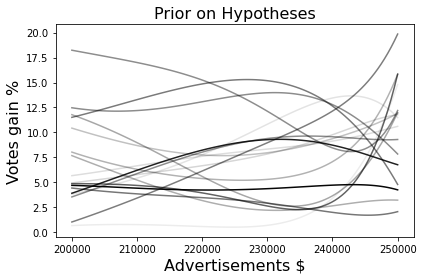

## Likelihood

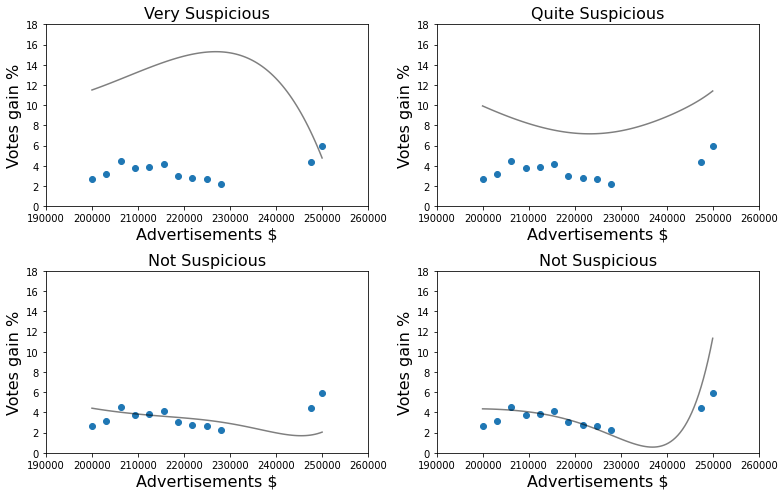

In [317]:
#plt.subplots(22)
plt.figure(figsize=(11,7))
plt.subplot(221)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][132]),color='black',alpha=0.5)
plt.title("Very Suspicious",fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.subplot(222)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][51])-0.5,color='black',alpha=0.5)
plt.title("Quite Suspicious",fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.subplot(223)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][119]),color='black',alpha=0.5)
plt.title("Not Suspicious",fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.tight_layout()
plt.subplot(224)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][165]-0.5),color='black',alpha=0.5)
plt.title("Not Suspicious",fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.tight_layout()
plt.savefig("likeli.pdf")

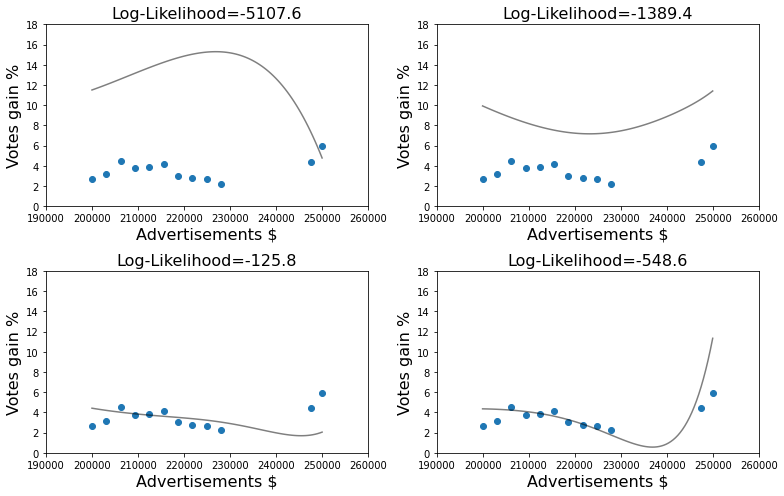

In [318]:
plt.figure(figsize=(11,7))
plt.subplot(221)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][132]),color='black',alpha=0.5)
logp=np.sum(pm.Normal.dist(np.dot(X8_tr,prior['theta'][132]),1/3).logp(y_tr).eval())
plt.title("Log-Likelihood="+str(np.round(logp,1)),fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.subplot(222)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][51])-0.5,color='black',alpha=0.5)
logp=np.sum(pm.Normal.dist(np.dot(X8_tr,prior['theta'][51])-0.5,1/3).logp(y_tr).eval())
plt.title("Log-Likelihood="+str(np.round(logp,1)),fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.subplot(223)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][119]),color='black',alpha=0.5)
logp=np.sum(pm.Normal.dist(np.dot(X8_tr,prior['theta'][119]),1/3).logp(y_tr).eval())
plt.title("Log-Likelihood="+str(np.round(logp,1)),fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.tight_layout()
plt.subplot(224)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,18])
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][165]-0.5),color='black',alpha=0.5)
logp=np.sum(pm.Normal.dist(np.dot(X8_tr,prior['theta'][165])-0.5,1/3).logp(y_tr).eval())
plt.title("Log-Likelihood="+str(np.round(logp,1)),fontsize=16)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.tight_layout()
plt.savefig("likeli1.pdf")

INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


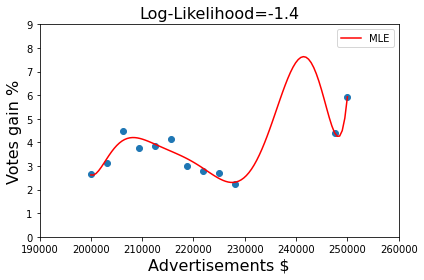

In [339]:

X8_tr = polynomial_basis(x_tr,degree=8)
theta_LS = leastsquares(X8_tr,y_tr)
X8_te = polynomial_basis(x_te,degree=8)
plt.plot(scale*x_te+shift,np.matmul(X8_te,theta_LS.reshape(-1,1)),zorder=100,color='r',label='MLE')
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
logp=np.sum(pm.Normal.dist(np.dot(X8_tr,theta_LS),1/3).logp(y_tr).eval())
plt.title("Log-Likelihood="+str(np.round(logp,1)),fontsize=16)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,9])
plt.legend()
plt.tight_layout()
plt.savefig("mle.pdf")

In [338]:
np.set_printoptions(suppress=True)
np.round(theta_LS,2)

array([     2.62,     -4.93,    485.88,  -4820.95,  21456.29, -51632.73,
        68795.28, -47378.28,  13102.74])

In [354]:
x_te=np.linspace(0,1,100)
X8_te = polynomial_basis(x_te,degree=8)
with pm.Model() as model:
    #prior
    theta_b = pm.Normal('theta', mu=0, sd=10, shape=(1+8,))
    #sigma = pm.HalfCauchy('sigma', 1)
    
    #linear model
    mu = pm.Deterministic('mu', pm.math.matrix_dot(X8_te,theta_b).T)

    #likelihood
    y_obs = pm.Normal('y',mu=mu, sd=0.1, observed=np.random.randn(len(x_te)))
    
    prior = pm.sample_prior_predictive(20000)


14
17
23
30
43
46
53
54
62
66
68
72
73
82
103
119
124
127
138
147
148


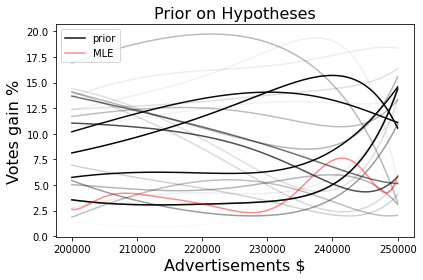

In [358]:
for i in range(0,150):
    
    if (np.min(np.dot(X8_te,prior['theta'][i]))>0)&(np.max(np.dot(X8_te,prior['theta'][i]))<20): 
        print(i)
        goodi=i
        plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][i]),color='black',alpha=np.exp(31.0+np.sum(pm.Normal.dist(mu=0, sd=10, shape=(1+8,)).logp(prior['theta'][i]).eval())))
plt.plot(scale*x_te+shift,np.dot(X8_te,prior['theta'][goodi]),color='black',alpha=np.exp(31.0+np.sum(pm.Normal.dist(mu=0, sd=10, shape=(1+8,)).logp(prior['theta'][i]).eval())) ,label='prior')
plt.plot(scale*x_te+shift,np.matmul(X8_te,theta_LS.reshape(-1,1)),zorder=100,color='r',alpha=0.45,label='MLE',Zorder=1000)
plt.title("Prior on Hypotheses",fontsize=16)        
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.tight_layout()
plt.legend()
plt.savefig("priors.pdf")

In [360]:
x_te=np.linspace(-0.1,1,100)
X8_te = polynomial_basis(x_te,degree=8)
with pm.Model() as model:
    #prior
    theta_b = pm.Normal('theta', mu=0, sd=10, shape=(1+8,))
    sigma = pm.HalfCauchy('sigma', 1)
    
    #linear model
    mu = pm.Deterministic('mu', pm.math.matrix_dot(X8_tr,theta_b).T)

    #likelihood
    y_obs = pm.Normal('y',mu=mu, sd=sigma, observed=y_tr)
    
    posterior = pm.sample(3000,chains=1,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, theta]
Sampling chain 0, 109 divergences: 100%|██████████| 4000/4000 [02:08<00:00, 31.06it/s]
There were 109 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [374]:
posterior['theta']

array([[  3.41822421,   3.62255101, -10.1004043 , ...,   3.60923672,
          7.20285711,  -2.49379016],
       [  2.97874597,   5.35943074, -11.5840171 , ...,   8.88655832,
         -7.60733481,  13.66706487],
       [  2.98233377,   4.87154356, -12.61789567, ...,   9.5431466 ,
         -7.68261583,  12.73777257],
       ...,
       [  2.65183731,   8.24380846, -12.648116  , ...,  -0.3642218 ,
          0.7410129 ,  10.72271559],
       [  3.4384242 ,   5.15857497, -17.17486039, ...,  -4.8866816 ,
         -6.93351674,   5.8952627 ],
       [  3.11470072,   6.33376358, -14.23616189, ...,  -4.2240247 ,
          3.4342113 ,   5.39015884]])

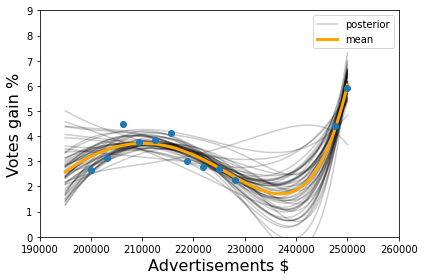

In [387]:
for i in range(0,50):
    plt.plot(scale*x_te+shift,np.dot(X8_te,posterior['theta'][i]),color='black',alpha=0.2)
plt.plot(scale*x_te+shift,np.dot(X8_te,posterior['theta'][i]),color='black',label='posterior',alpha=0.2)
plt.plot(scale*x_te+shift,np.dot(X8_te,np.mean(posterior['theta'],axis=0)),color='orange',label='mean',lw=3,alpha=1,Zorder=1000)
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.scatter(scale*x_tr+shift,y_tr,Zorder=2000)
plt.xlim([190000,260000])
plt.ylim([0,9])
plt.legend()
plt.tight_layout()
plt.savefig("post.pdf")

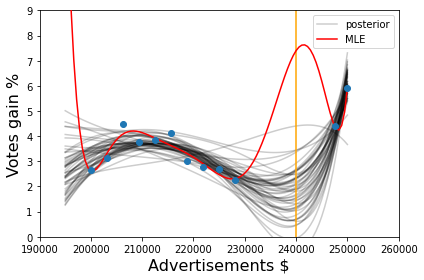

In [379]:
x_te=np.linspace(-0.1,1,100)
X8_te = polynomial_basis(x_te,degree=8)
for i in range(0,50):
    plt.plot(scale*x_te+shift,np.dot(X8_te,posterior['theta'][i]),color='black',alpha=0.2)
plt.plot(scale*x_te+shift,np.dot(X8_te,posterior['theta'][i]),color='black',label='posterior',alpha=0.2)
plt.plot(scale*x_te+shift,np.matmul(X8_te,theta_LS.reshape(-1,1)),zorder=100,color='r',label='MLE')
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
plt.scatter(scale*x_tr+shift,y_tr,Zorder=1000)
plt.xlim([190000,260000])
plt.ylim([0,9])
plt.axvline(240000,color='orange')
plt.legend()
plt.tight_layout()

plt.savefig("post_slice.pdf")

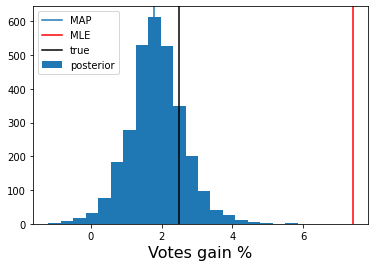

In [406]:
#import arviz as az
x_te=np.array([40000/scale])
X8_te = polynomial_basis(x_te,degree=8)
plt.hist(np.dot(X8_te,posterior['theta'].T)[0,:],label='posterior',bins=20)
plt.axvline(np.dot(X8_te,mapp['theta'].T),label='MAP')
plt.axvline(np.dot(X8_te,theta_LS),color='r',label='MLE')
plt.axvline(2.5,color='black',label='true')
plt.xlabel("Votes gain %",fontsize=16)
plt.legend()
plt.savefig("ypred.pdf")

In [404]:
np.dot(X8_te,posterior['theta'].T).shape

(1, 3000)

# MAP

In [391]:
x_te=np.linspace(-0.1,1,100)
X8_te = polynomial_basis(x_te,degree=8)
with pm.Model() as model:
    #prior
    theta_b = pm.Normal('theta', mu=0, sd=10, shape=(1+8,))
    sigma = pm.HalfCauchy('sigma', 1)
    
    #linear model
    mu = pm.Deterministic('mu', pm.math.matrix_dot(X8_tr,theta_b).T)

    #likelihood
    y_obs = pm.Normal('y',mu=mu, sd=sigma, observed=y_tr)
    
    mapp = pm.find_MAP()

INFO (theano.gof.compilelock): Refreshing lock /home/benavoli/.theano/compiledir_Linux-5.4--generic-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
logp = -35.925, ||grad|| = 0.013853: 100%|██████████| 71/71 [00:00<00:00, 1982.03it/s]  


In [396]:
np.round(mapp['theta'],2)

array([  3.05,   7.1 , -16.31,  -3.34,   4.43,   6.21,   4.74,   1.81,
        -1.68])

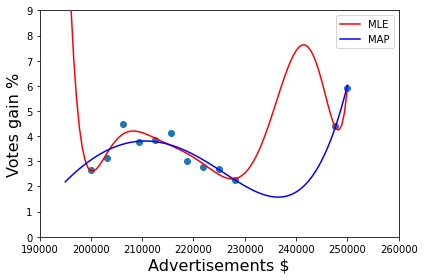

In [399]:
x_te=np.linspace(-0.1,1,100)
X8_te = polynomial_basis(x_te,degree=8)
plt.plot(scale*x_te+shift,np.matmul(X8_te,theta_LS.reshape(-1,1)),zorder=100,color='r',label='MLE')
plt.plot(scale*x_te+shift,np.matmul(X8_te,mapp['theta'].T),zorder=100,color='b',label='MAP')
plt.xlabel("Advertisements $",fontsize=16)
plt.ylabel("Votes gain %",fontsize=16)
#logp=np.sum(pm.Normal.dist(np.dot(X8_tr,theta_LS),1/3).logp(y_tr).eval())
#plt.title("Log-Likelihood="+str(np.round(logp,1)),fontsize=16)
plt.scatter(scale*x_tr+shift,y_tr)
plt.xlim([190000,260000])
plt.ylim([0,9])
plt.legend()
plt.tight_layout()
plt.savefig("map.pdf")

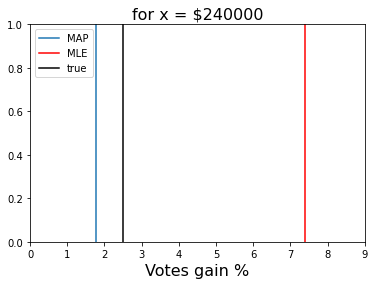

In [402]:
import arviz as az
x_te=np.array([40000/scale])
X8_te = polynomial_basis(x_te,degree=8)
plt.axvline(np.dot(X8_te,mapp['theta'].T),label='MAP')
plt.axvline(np.dot(X8_te,theta_LS),color='r',label='MLE')
plt.axvline(2.5,color='black',label='true')
plt.title("for x = $240000", fontsize=16)
plt.xlabel("Votes gain %",fontsize=16)
plt.xlim([0,9])
plt.legend()
plt.savefig("ypred0.pdf")